In [1]:
# Importo las Librerias que voy a usar
import pandas as pd 
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 


In [329]:
# levanto el DF
df=pd.read_csv("./final_data.csv")
df.head(1)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0


In [330]:
# Renombro las columnas
df = df.rename(columns={
    'player': 'Jugador',
    'team': 'Equipo',
    'name': 'Nombre',
    'position': 'Posicion',
    'height': 'Altura',
    'age': 'Edad',
    'appearance': 'Apariciones',
    'goals': 'Goles',
    'assists': 'Asistencias',
    'yellow cards': 'Tarjetas Amarillas',
    'second yellow cards': '2da Tarjeta Amarillas',
    'red cards': 'Tarjetas Rojas',
    'goals conceded': 'Goles Concedidos',
    'clean sheets': 'Valla Invicta',
    'minutes played': 'Minutos Jugados',
    'days_injured': 'Dias De baja por Lesion',
    'games_injured': 'Partidos Perdidos por Lesion',
    'award': 'Premios',
    'current_value': 'Valor Actual',
    'highest_value': 'Valor Maximo',
    'position_encoded': 'Posicion Numero',
    'winger': 'Extremo'})

Grafico 1 --> Grafico BoxPlot (Posicion de campo y su Altura)

En este grafico, se uso  la libreria de Python llamada Matplotlib para generar el gráfico BoxPlots
en el se analiza la altura del jugador con la posicion de campo.

Como tenia subdivisiones, ejemplo media punta, punta izquierdo, se normalizo, todo a puntas, o delanteros, como se llama en argentina.

Asi, entonces quedan las 4 divisiones de posiciones, y en los cuales se pueden ver en el grafico, como varian los promedios de alturas, segun la posicion, los outliers, y los cuartiles, entre por ejemplo los arqueros y las demas posiciones.

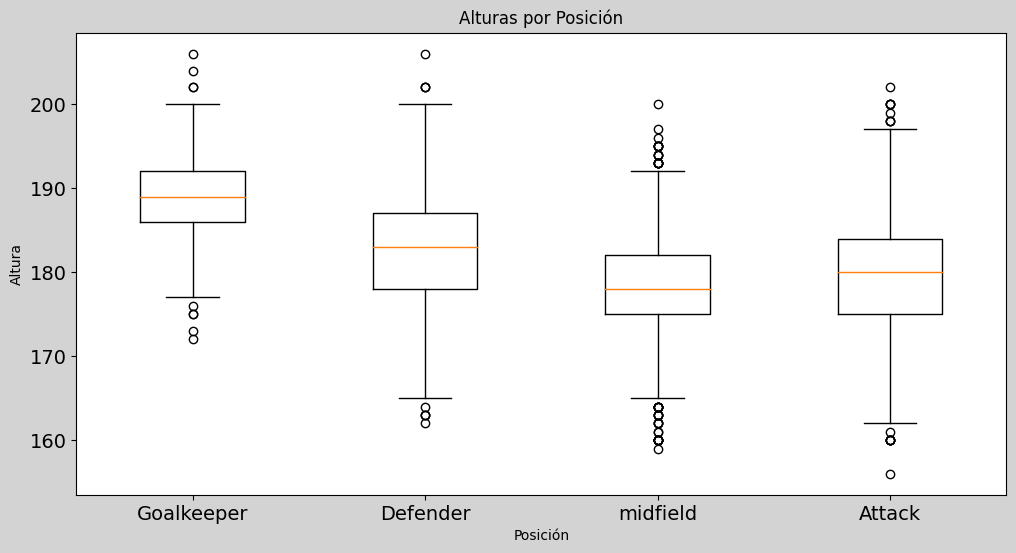

In [333]:
#Tomo  la primera palabra y excluyo los espacios en blanco y guiones.
df['Posicion']= df['Posicion'].str.extract(r'^\s*([^\s-]+)')


# Elijo las columnas a graficar
puestos = df[['Posicion', 'Altura']].round(1)

# tamaño del grafico
fig, ax = plt.subplots(figsize=(12, 6))


# [puestos['Altura'][puestos['Posicion'] == pos]    --> crea una lista asociada a cada posicion
# labels=puestos['Posicion'].unique()               --> muestro los valores unicos para los labels

ax.boxplot([puestos['Altura'][puestos['Posicion'] == pos] for pos in puestos['Posicion'].unique()],
                 labels=puestos['Posicion'].unique())


#  agrego negrita a las letras para que se vea mejor
plt.tick_params(axis='both', which='major', labelsize=14)

# Etiquetas de los ejes y titulo.
plt.xlabel('Posición')
plt.ylabel('Altura en cm')
plt.title('Alturas por Posición ')

# Color de fondo
plt.gcf().set_facecolor('lightgray')

#guardo el archivo de alturas por posicion
plt.savefig("../PDF_GRAFICOS/1-MatplotLib-Boxplot.pdf", dpi=300)

# Mostrar el gráfico
plt.show()


Grafico 2 --> Grafico Histograma

En el siguiente grafico se va a analizar, las edades de los equipos Grandes de argentina

Primero se crea una funcion que extraiga cuando encuentre coincidencia de los nombres pasados por parametros.

Los equipos son Boca, River, Racing, Independiente, San Lorenzo.

Luego se unen, para crear un df completo.

In [334]:
# Funcion que dado un parametro, crea un dataframe el equipo que tenga coincidencia.
def filtrar_por_equipo(dataframe, equipo):
    filtro = dataframe['Equipo'].str.contains(equipo, case=False, regex=False)
    resultado = dataframe[filtro]
    return resultado

# Aplico Funcion 

# Para Boca
equipo_deseado = 'Boca'
Boca = filtrar_por_equipo(df, equipo_deseado)

# Para River
equipo_deseado = 'River'
River = filtrar_por_equipo(df, equipo_deseado)

#Para Racing
equipo_deseado = 'Racing'
Racing = filtrar_por_equipo(df, equipo_deseado)

#Para Independiente 
equipo_deseado = 'Independiente'
Independiente = filtrar_por_equipo(df, equipo_deseado)

#Para San Lorenzo
equipo_deseado = 'San Lorenzo'
San_Lorenzo = filtrar_por_equipo(df, equipo_deseado)

# creo el data, y luego los uno para que me quede uno solo
cinco_grandes=[Boca,River,Racing,Independiente,San_Lorenzo]
df_5grandes=pd.concat(cinco_grandes, ignore_index=False)



2-Creacion de un grafico Histograma

En funcion de la creacion del df5grandes, se analizara la frecuencia de edades, en funcion a esos equipos.

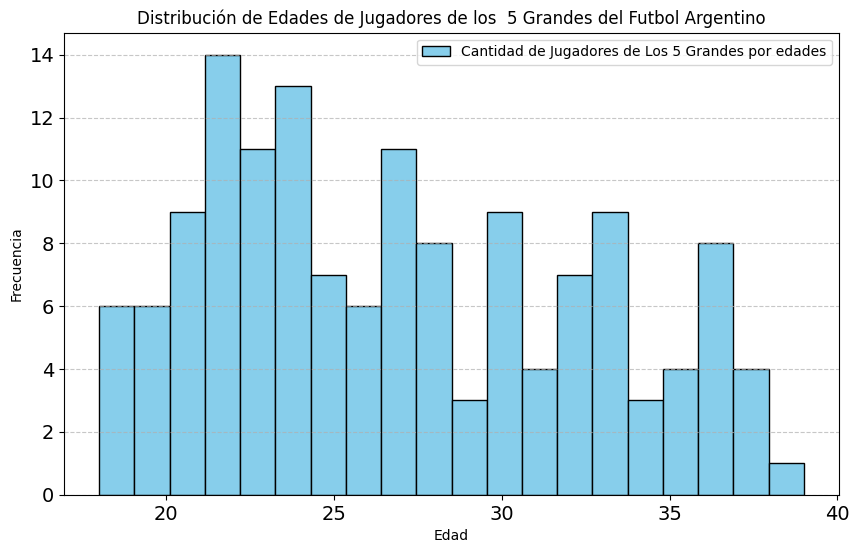

In [335]:
# Crea un histograma de edades para todos los jugadores
plt.figure(figsize=(10, 6))

# paso los parametros, tamaño,  y colores.
plt.hist(df_5grandes['Edad'],bins=20, color='skyblue', edgecolor='black')

#titulo
plt.title('Distribución de Edades de Jugadores de los  5 Grandes del Futbol Argentino')

# etiquetas a los ejes
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

#  mostrar la gráfica con las letras en negrita
plt.tick_params(axis='both', which='major', labelsize=14)

# trazo una linea en el eje y para tener mejor nocion de los datos.
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Leyenda
plt.legend(['Cantidad de Jugadores de Los 5 Grandes por edades'])

#Guardo el archivo
plt.savefig("../PDF_GRAFICOS/2-MatplotLib-Histograma.pdf", dpi=300)

# Mostrar gráfica en pantalla
plt.show()

Grafico 2.1 --> Histograma de edades comparativo 

Cruzo los histogramas, por un lado, las edades total de todos los equipos del DF, y las edades de los 5 grandes del futbol argentino

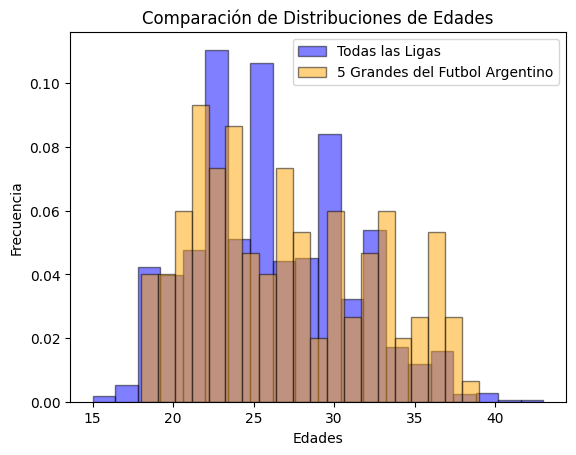

In [336]:

# Histograma de la edad de todos los equipos.
plt.hist(df['Edad'], bins=20, 
                     alpha=0.5,
                     edgecolor='black', 
                     label='Todas las Ligas', 
                     color='blue', 
                     density=1)

# Histograma de edades de los 5 grandes del futbol argentino.

# se agrega densidad en 1, para que se  vean mas claramente las barras. y no se vean distorcionadas-
plt.hist(df_5grandes['Edad'],bins=20,
                             alpha=0.5,
                             edgecolor='black',
                             label='5 Grandes del Futbol Argentino', 
                             color='orange', 
                             density=1)

# Etiquetas y titulo.
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.title('Comparación de Distribuciones de Edades')
plt.legend()

#Guardo el archivo
plt.savefig("../PDF_GRAFICOS/2.1-Matplotlib-Histograma.pdf", dpi=300)
# Muestra el gráfico
plt.show()

3-Grafico Bar

Aca se crearon dos graficos de Barras, uno horizontal y otro vertical.

Las variables que se usaron son los valores de los pases, actuales, y maximos, donde se analiza los jugadores mas caros de la actualidad, y en el otro grafico se muestra los clubes donde pertenecen.

In [337]:
# normalizo las posiciones
df['Posicion']= df['Posicion'].str.extract(r'^\s*([^\s-]+)')
# elijo las columnas a usar 
df_posiciones=df[['Equipo','Nombre','Posicion','Edad','Valor Actual','Valor Maximo']].round(1)

# ordeno por el valor actual mas caro
df_ordenado = (df_posiciones.sort_values(by='Valor Actual', ascending=False)).head(10)

# saco dif entre el valor maximo y actual
df_ordenado['Variacion'] = df_ordenado['Valor Actual'] - df_ordenado['Valor Maximo'] 

# cambio las unidades , para mostrarlo en millones
df_ordenado['Valor Actual']= df_ordenado['Valor Actual'] / 1000000
df_ordenado['Valor Maximo']= df_ordenado['Valor Maximo'] / 1000000
df_ordenado['Variacion']   = df_ordenado['Variacion']    / 1000000

# renombro columnas.
df_ordenado = df_ordenado.rename(columns={'Valor Actual':'Valor Actual en Millones USD'})
df_ordenado = df_ordenado.rename(columns={'Valor Maximo':'Valor Maximo en Millones USD'})
df_ordenado = df_ordenado.reset_index(drop=True)
df_ordenado.head(2)

,Equipo,Nombre,Posicion,Edad,Valor Actual en Millones USD,Valor Maximo en Millones USD,Variacion
0,Paris Saint-Germain,Kylian Mbappé,Attack,24.0,180.0,200.0,-20.0
1,Manchester City,Erling Haaland,Attack,22.0,170.0,170.0,0.0


In [340]:
# agrupo en funcion a los jugadores, los agrupo por club
# reseteo los indices, y muestro los valores de los clubes que tienen a los jugadores mas caros del mundo.
df_ordenado_equipo = df_ordenado.groupby('Equipo').agg({'Valor Actual en Millones USD': 'sum'}).reset_index()
df_ordenado_equipo.head(2)

,Equipo,Valor Actual en Millones USD
0,Arsenal FC,110.0
1,Bayern Munich,110.0


C:\Users\Usuario\AppData\Local\Temp\ipykernel_22028\2698815938.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')


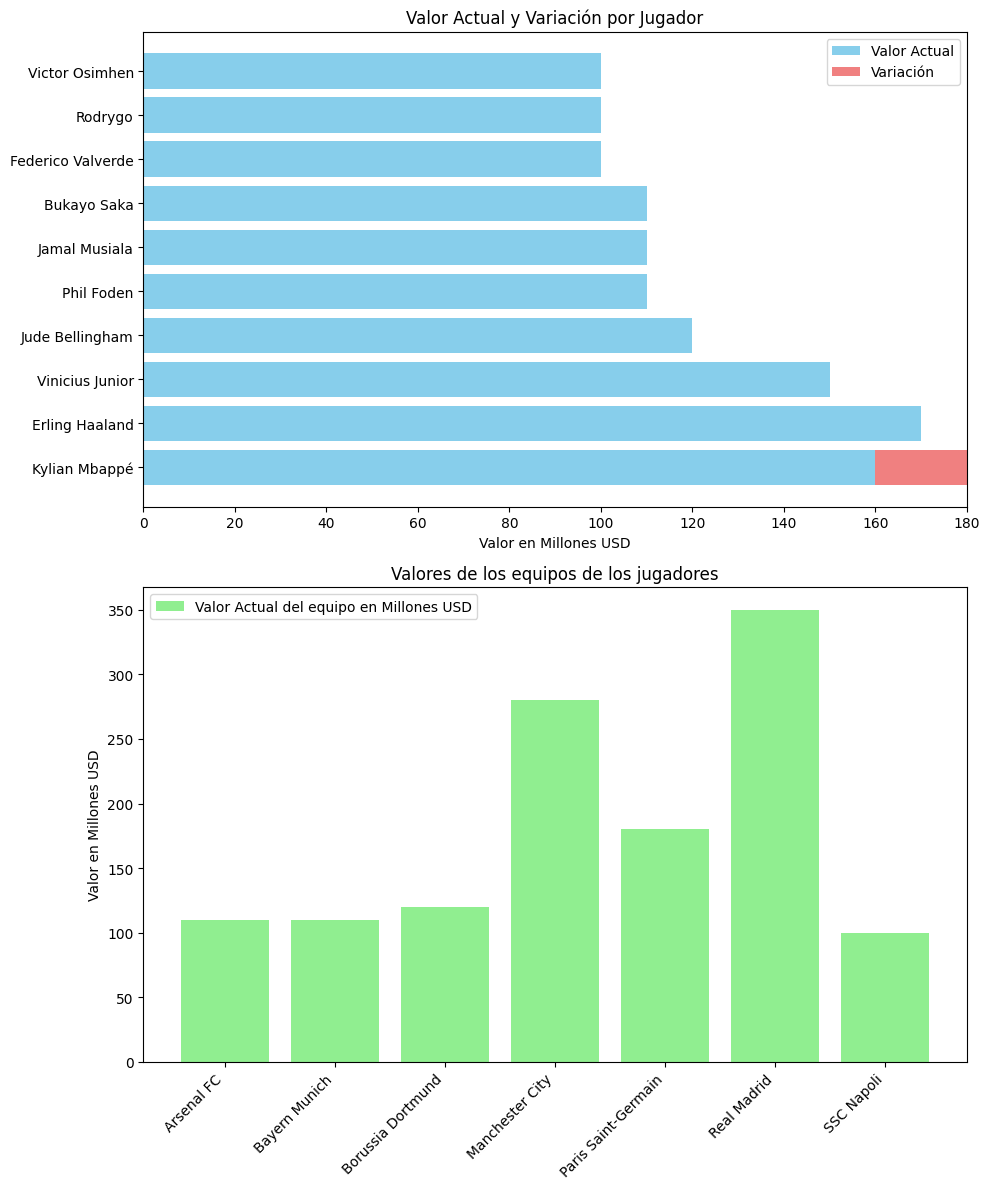

In [343]:

# creo dos graficos y paso el tamaño
fig, (ax1, ax2) = plt.subplots( 2,1, figsize=(10,12))

# Creo las variables para pasar por parametro
jugadores = df_ordenado['Nombre']
valor_actual = df_ordenado['Valor Actual en Millones USD']
variacion = df_ordenado['Variacion']

# valores del grafico 1, para ambas barras de jugadores
ax1.barh(jugadores, valor_actual, label='Valor Actual', color='skyblue')
ax1.barh(jugadores, variacion, label='Variación', color='lightcoral', left=valor_actual)

# titulos a los ejes y al grafico
ax1.set_title("Jugadores  con mayor Valor Actual")
ax1.set_xlabel('Valor en Millones USD')
ax1.set_title('Valor Actual y Variación por Jugador')
ax1.legend()

#Grafico numero 2, para los equipos de los jugadores

# paso los parametros para la creacion del grafico 2 que son los equipos
ax2.bar(df_ordenado_equipo['Equipo'], df_ordenado_equipo['Valor Actual en Millones USD'], 
                            label='Valor Actual del equipo en Millones USD', color='lightgreen')

# rotacion de los nombres de los ejes, para evitar superposicion
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.set_ylabel('Valor en Millones USD')
ax2.set_title("Valores de los equipos de los jugadores")
# leyenda
ax2.legend()

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()

plt.savefig("../PDF_GRAFICOS/3-Matplotlib-Bar.pdf", dpi=300)
# Mostrar el gráfico
plt.show()




usar el Hue, para ver los equipos.